In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\LENOVO\python datascience basics (hydrabad ds)\ASSIGNMENT DATA SCIENCE\MLR\MLR\ToyotaCorolla - MLR.csv")
df.head()


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [2]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
unique,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Petrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10730.824513,55.947075,68533.259749,NaN,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,NaN,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,NaN,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,NaN,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,NaN,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,NaN,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000


In [3]:
df.isnull().sum()


Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

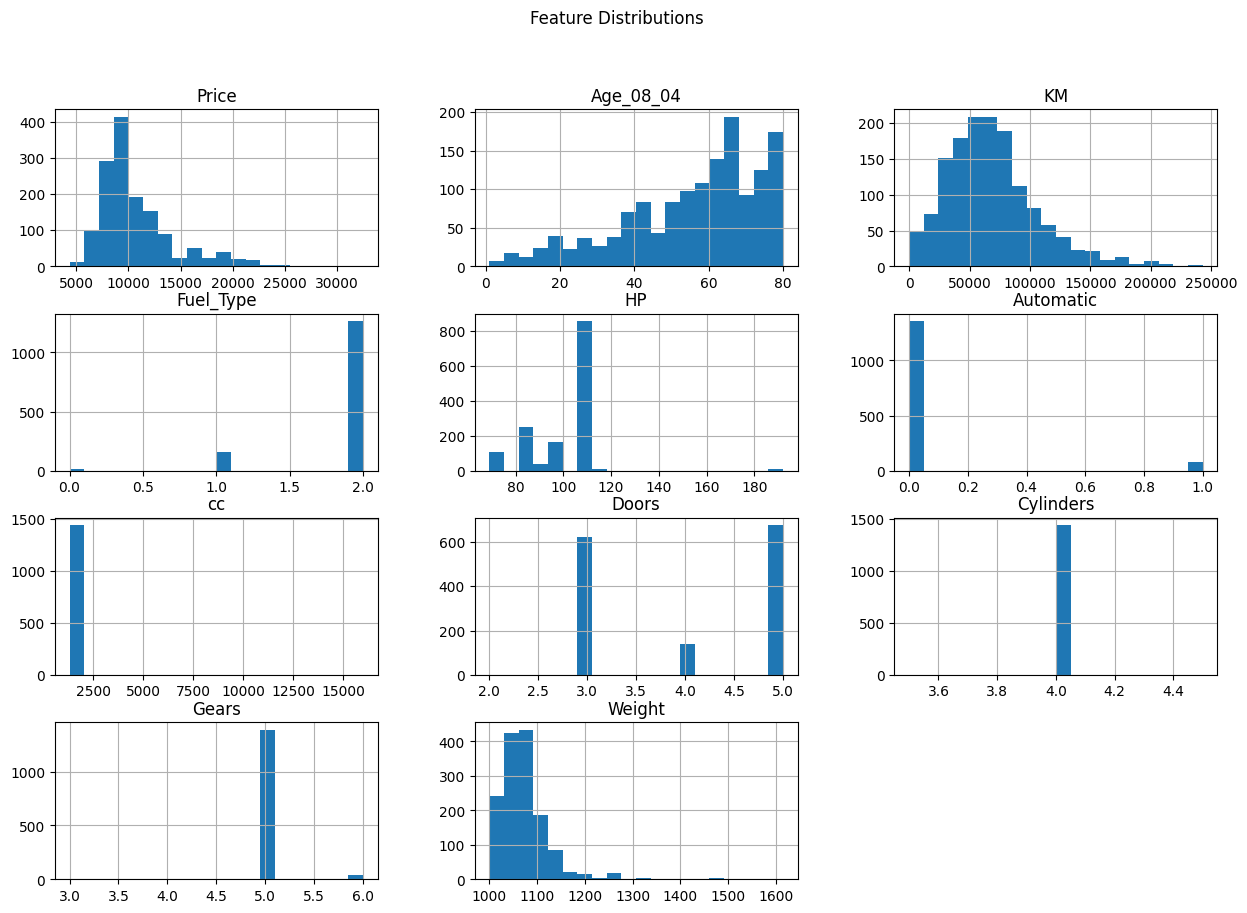

In [17]:
# Histograms
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions")
plt.show()




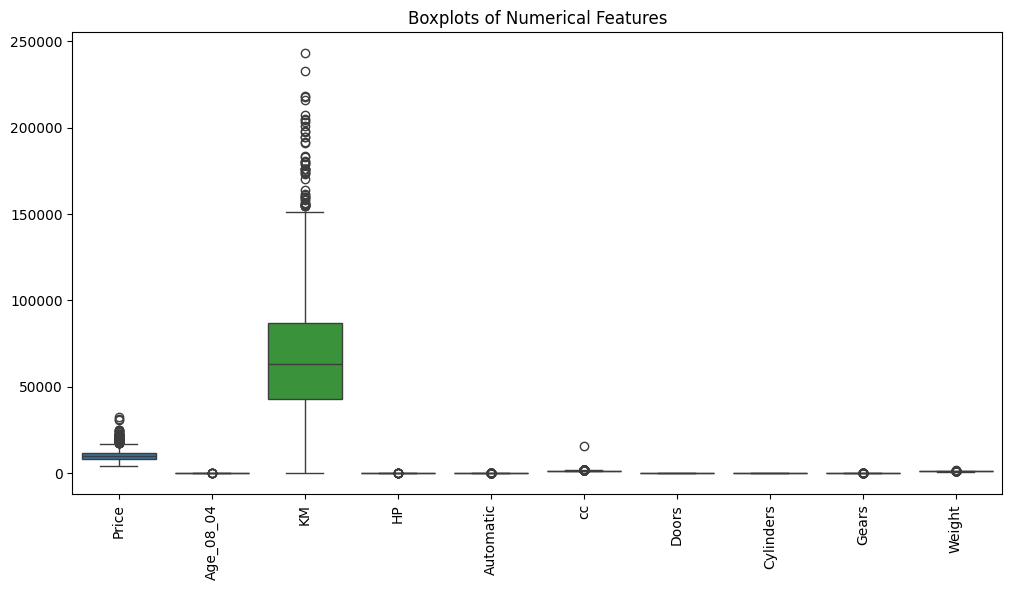

In [18]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['int64', 'float64']))
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=90)
plt.show()


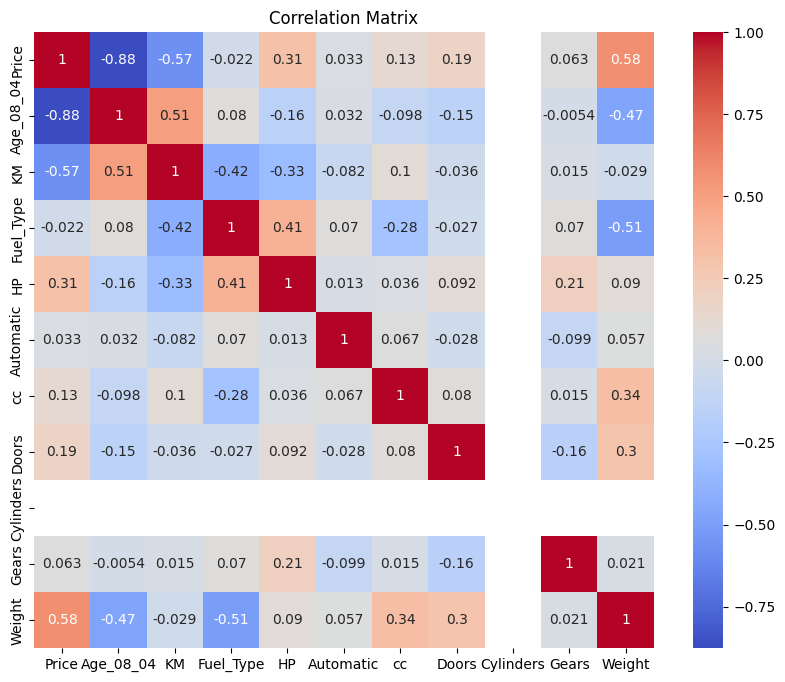

In [19]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [20]:
df_encoded = pd.get_dummies(df, columns=["Fuel_Type"], drop_first=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Fuel_Type"] = le.fit_transform(df["Fuel_Type"])

# Convert categorical columns to numeric
#df = pd.get_dummies(df, columns=['Fuel_Type', 'Doors'], drop_first=True)

# Drop rows with missing values if any
df = df.dropna()

# Define X and y
X = df.drop('Price', axis=1)
y = df['Price']


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [23]:
# Choose top 5 correlated with Price
from sklearn.linear_model import LinearRegression
# Handle categorical data
df = pd.get_dummies(df, drop_first=True)

top_corr = df.corr()['Price'].abs().sort_values(ascending=False)[1:6].index.tolist()
X2 = df[top_corr]
y2 = df['Price']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)


LinearRegression()

In [24]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

# Coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model1.coef_
})
print(coeff_df)


     Feature   Coefficient
0  Age_08_04 -1.214362e+02
1         KM -1.693560e-02
2  Fuel_Type  8.620564e+02
3         HP  2.065828e+01
4  Automatic  2.451969e+02
5         cc -7.351539e-02
6      Doors -3.627965e+01
7  Cylinders -1.250555e-12
8      Gears  5.302820e+02
9     Weight  2.351064e+01


In [25]:
# Make sure all data is numeric
import numpy as np
X_clean = X.select_dtypes(include=[np.number]).copy()

# Replace inf/-inf and drop NaNs
X_clean.replace([np.inf, -np.inf], np.nan, inplace=True)
X_clean.dropna(inplace=True)

# Align y to match X_clean after dropping rows
y_clean = y[X_clean.index]


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X_df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_df.columns
    vif_data["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]
    return vif_data

vif_data = calculate_vif(X_clean)
print(vif_data)


     Feature          VIF
0  Age_08_04     1.918394
1         KM     1.946100
2  Fuel_Type     2.379914
3         HP     1.488481
4  Automatic     1.062652
5         cc     1.168921
6      Doors     1.186610
7  Cylinders  1756.548275
8      Gears     1.113522
9     Weight     2.327003


In [27]:
high_vif_features = vif_data[vif_data['VIF'] > 10]['Feature'].tolist()
X3 = X_clean.drop(columns=high_vif_features)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y_clean, test_size=0.2, random_state=42)

model3 = LinearRegression()
model3.fit(X3_train, y3_train)

# Optional: print coefficients
pd.DataFrame({'Feature': X3.columns, 'Coefficient': model3.coef_})


,Feature,Coefficient
0,Age_08_04,-121.436240
1,KM,-0.016936
2,Fuel_Type,862.056431
3,HP,20.658283
4,Automatic,245.196891
5,cc,-0.073515
6,Doors,-36.279648
7,Gears,530.282040
8,Weight,23.510643


In [29]:

from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_clean, test_size=0.2, random_state=42
)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)
y_lasso_pred = lasso.predict(X_test_scaled)

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train_scaled)
y_ridge_pred = ridge.predict(X_test_scaled)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f" {name} Regression Evaluation:")
    print("R²:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))
    print()

evaluate_model("Lasso", y_test_scaled, y_lasso_pred)
evaluate_model("Ridge", y_test_scaled, y_ridge_pred)


 Lasso Regression Evaluation:
R²: 0.8428573904636939
MAE: 992.909349818201
RMSE: 1448.0057518501812

 Ridge Regression Evaluation:
R²: 0.8429058749675314
MAE: 992.8698671238695
RMSE: 1447.78235204547



# 1.What is Normalization & Standardization and how is it helpful?
 Normalization: Rescales data to [0, 1] range — often used for neural networks.

Standardization: Transforms data to have zero mean and unit variance.

Useful in regression to:


Essential for Lasso/Ridge which are scale-sensitive.

# 2.  How to address multicollinearity in MLR?
Check correlation matrix or use VIF.

Remove highly correlated variables.

Use dimensionality reduction (PCA).

Apply regularization like Ridge/Lasso which handle collinearity via penalties.

